In [1]:
# Let's use machine learning to create models that predicts which passengers survived the Titanic shipwreck.
# We are going to use the data from Kaggle page (https://www.kaggle.com/c/titanic). Here we have file train.cvs, which 
# we will use to train the model, and file test.cvs, which we will use to make predictions.

In [2]:
# 1. let’s import the libraries we are going to use for read and processing the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from pandas.plotting import scatter_matrix

from sklearn.tree import DecisionTreeClassifier     
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC                         
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance # for naive bayes feature important


from sklearn.tree import export_graphviz
import graphviz

In [3]:
# We are using pandas to load the data.
df = pd.read_csv('train.csv')
prediction = pd.read_csv('test.csv')

In [4]:
# 2. Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)
print('prediction')
print('Head')
print(prediction.head())
print('Tail')
print(prediction.tail())
print('Shape:', prediction.shape)

df
Head
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN      

In [5]:
# We can see that the dataframe df has 891 rows and 12 columns. The columns are labeled and on the Kaggle page we can find 
# a description of each of them, which is the following:
# survival: Survival (0 = No, 1 = Yes)
# pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
# sex: Sex
# Age: Age in years
# sibsp: number of siblings / spouses aboard the Titanic
# parch: number of parents / children aboard the Titanic
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
# The dataframe "prediction" has 418 rows and 11 columns. The missing column is the one corresponding to "survival".

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing data in percentage
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [6]:
# we can see that most of the data from Cabin is missing, and a non-negligible amount of data from Age. 
# Although we assume that Cabin's data will be irrelevant
# Let's know the type of data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# We do a statistical analysis of the data
# count: number of non-null data in column
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: mmaximum column value
# unique: number of distinct objects in the column
# top: data that is repeated the most
# freq: the number of times the most repeated data appears
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Chapman, Mr. John Henry",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Print a concise summary of a DataFrame.
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
# 3 - data processing
# Working with missing data

# Before we make a copy of the original data
dfCopy = df.copy()

# From the Age column we take the mean and round it
Meandf = round(df["Age"].mean()) 
print("Meandf", Meandf) 
Meanprediction = round(prediction["Age"].mean())
print("Meanprediction", Meanprediction) 

# We replace the data from Age column with that mean
df["Age"] = df["Age"].replace(np.nan, Meandf)
prediction["Age"] = prediction["Age"].replace(np.nan, Meanprediction)

# Change categorical variables to numeric
df['Sex'].replace(['female', 'male'], [0, 1], inplace = True)
prediction['Sex'].replace(['female', 'male'], [0, 1], inplace = True)

df['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace = True)
prediction['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2], inplace = True)

# We create several groups according to age bands
# Bands: 0-12, 9-21, 22-40, 41-60, 61-100
bins = [0, 12, 21, 40, 60, 100]
names = ['1', '2', '3', '4', '5']
df['Age'] = pd.cut(df['Age'], bins, labels = names)
prediction['Age'] = pd.cut(prediction['Age'], bins, labels = names)

# The Cabin column is removed as it has a lot of lost data
df.drop(['Cabin'], axis = 1, inplace=True)
prediction.drop(['Cabin'], axis = 1, inplace=True)

# We delete the columns that we think are not necessary for the analysis (PassengerId, Name, Ticket)
df = df.drop(['PassengerId','Name','Ticket'], axis=1)
prediction = prediction.drop(['Name','Ticket'], axis=1)

# Rows with missing data are deleted
df.dropna(axis=0, how='any', inplace=True)
prediction.dropna(axis=0, how='any', inplace=True)

# Let's check the data one more time
print("Missing date df:")
print(pd.isnull(df).sum())
print("Missing date prediction:")
print(pd.isnull(prediction).sum())
print("df shape:", df.shape)
print("prediction shape:", prediction.shape)
print("df head:", df.head())
print("prediction head:", prediction.head())

# The data is ready

Meandf 30
Meanprediction 30
Missing date df:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Missing date prediction:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
df shape: (889, 8)
prediction shape: (417, 8)
df head:    Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   3      1      0   7.2500       1.0
1         1       1    0   3      1      0  71.2833       2.0
2         1       3    0   3      0      0   7.9250       1.0
3         1       1    0   3      1      0  53.1000       1.0
4         0       3    1   3      0      0   8.0500       1.0
prediction head:    PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   3      0      0   7.8292         0
1          893       3    0   4      1      0   7.0000         1
2          894   

In [10]:
# Finding the number of people survived and not survived
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

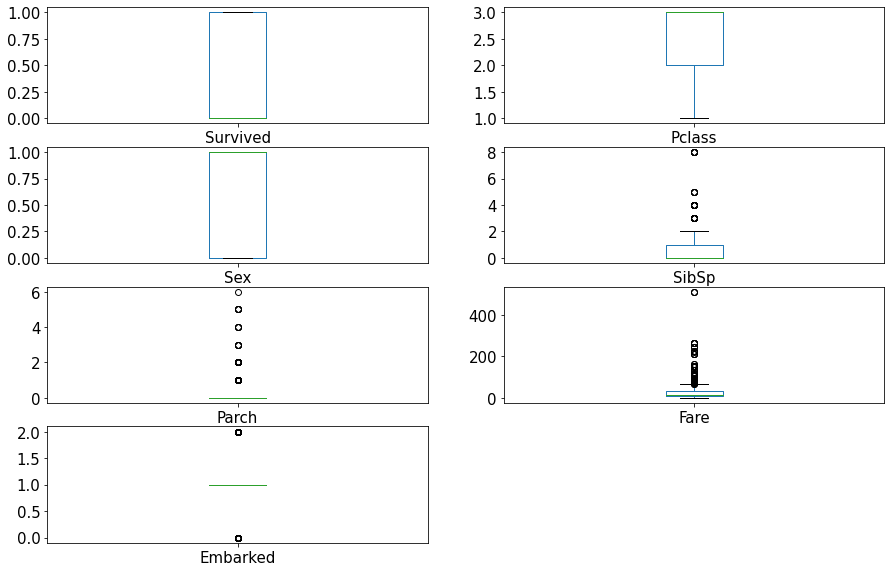

In [11]:
# Extend that with some visualizations.
# Plots of each individual variable. We can create box and whisker plots of each.

# Make a box-and-whisker plot from DataFrame columns, optionally grouped by some other columns. 
# A box plot is a method for graphically depicting groups of numerical data through their quartiles. 
# The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). 
# The whiskers extend from the edges of box to show the range of the data. By default, they extend no more than 
# 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. 
# Outliers are plotted as separate dots.

df.plot(kind='box', subplots=True, layout=(6,2), figsize=(15,15), fontsize=15)
plt.savefig('whisker.jpg')
plt.show()

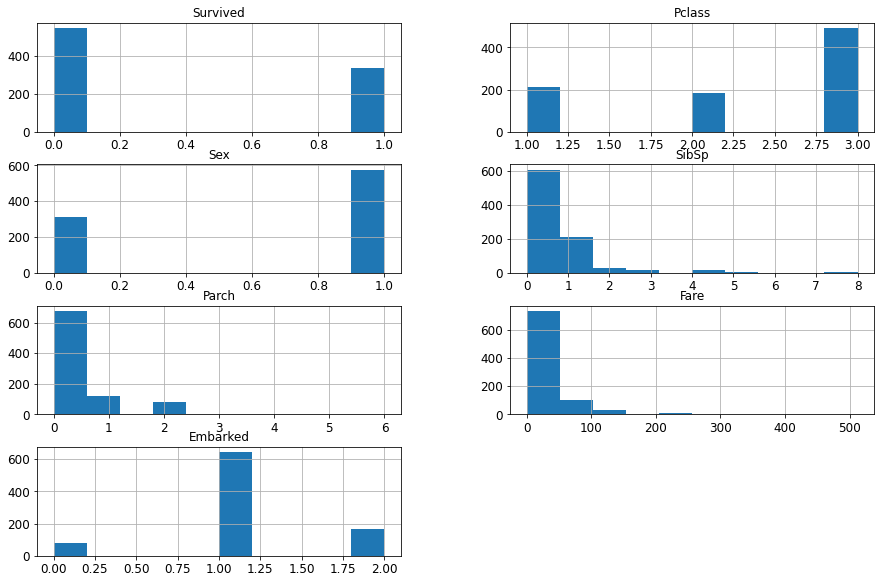

In [12]:
# histograms (https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.DataFrame.hist.html#:~:text=hist()%20%2C%20on%20each%20series,in%20one%20histogram%20per%20column.&text=The%20pandas%20object%20holding%20the%20data.&text=If%20passed%2C%20will%20be%20used,to%20a%20subset%20of%20columns.&text=If%20passed%2C%20then%20used%20to%20form%20histograms%20for%20separate%20groups.)
df.hist(layout=(6,2), xlabelsize=12, ylabelsize=12, figsize=(15,15))
plt.savefig('histograms.jpg')
plt.show()

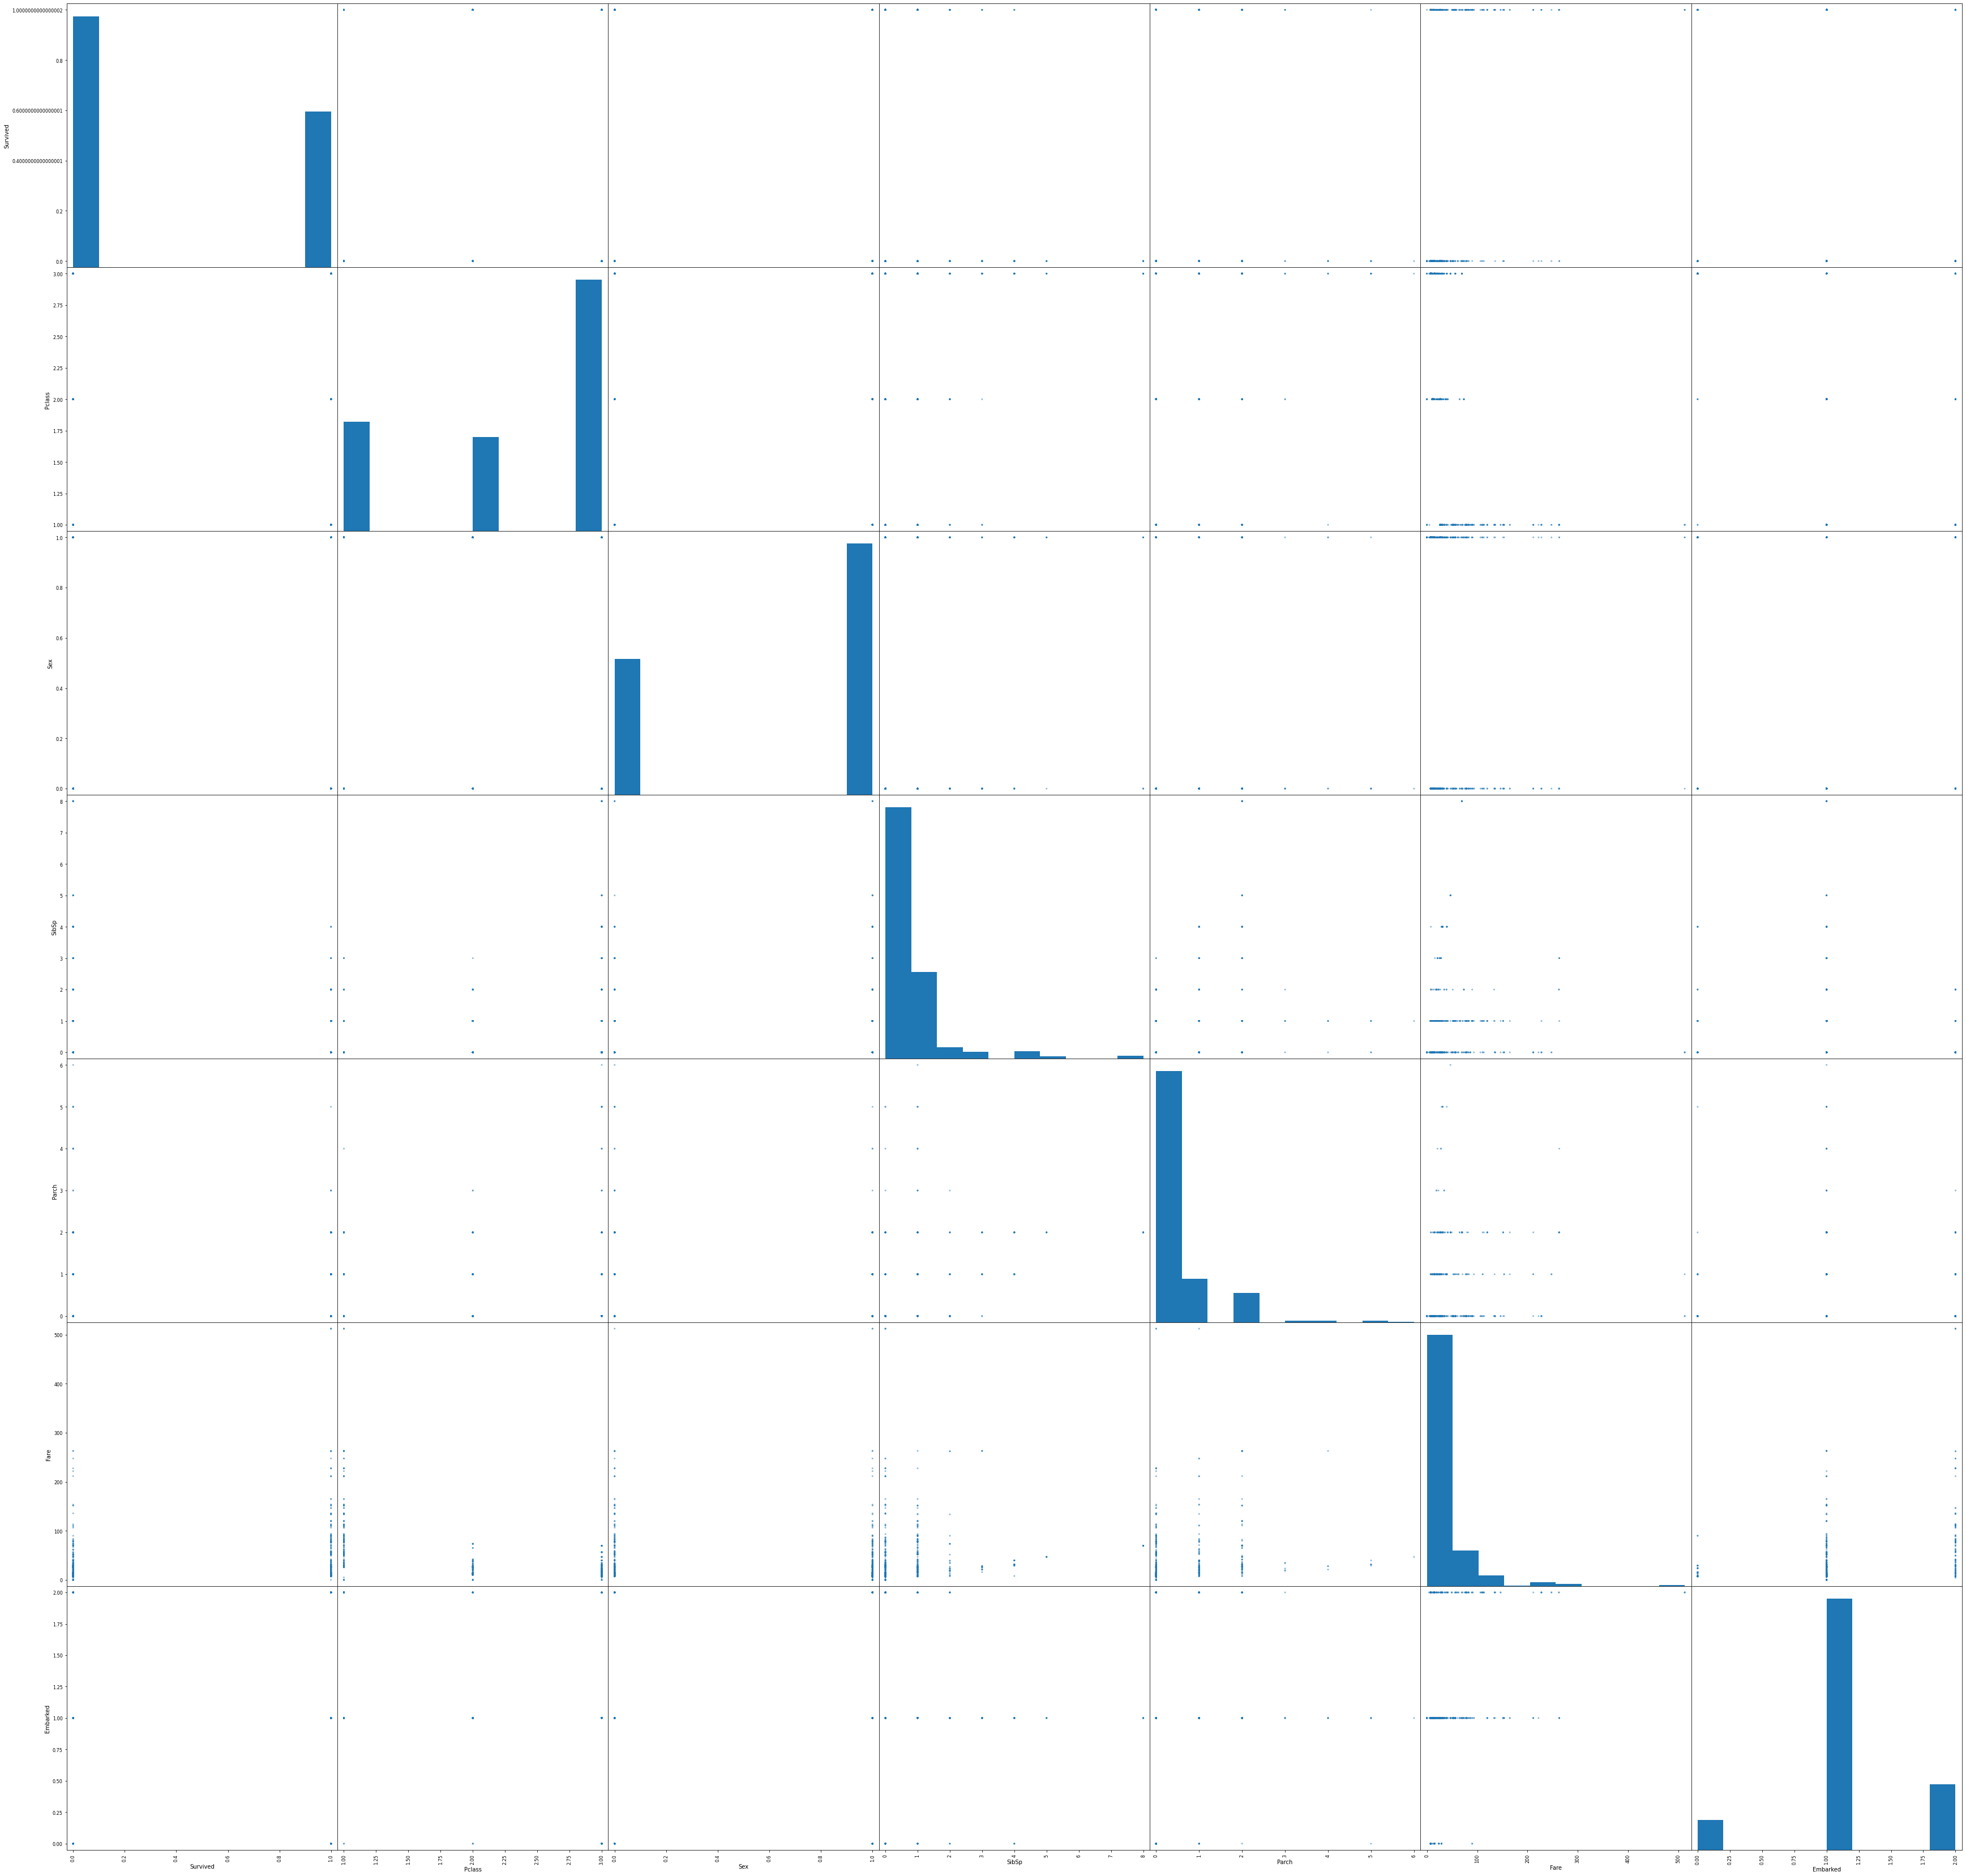

In [13]:
# scatter plot matrix
scatter_matrix(df, figsize=(60,60))
plt.savefig('scatter.jpg')
plt.show()

In [14]:
# 4 - Create a Validation Dataset
# We separate the column with the information of the survivors
X = np.array(df.drop(['Survived'], 1))
y = np.array(df['Survived'])

In [15]:
# We split out df into training data for preparing the models and testing data that we will use for testing them.
# We choose 20 % for test and the rest for train
# We divided the original data into training and test sets was to use the test set as a way to estimate how well the 
# model trained on the training data would generalize to new previously unseen data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

TRAIN SCORES:
[[0.78199719 0.78199719 0.7862166  0.79465541 0.78651685]
 [0.79606188 0.78481013 0.79184248 0.80028129 0.78651685]
 [0.82137834 0.82278481 0.8326301  0.83966245 0.80617978]
 [0.83403657 0.83403657 0.84388186 0.84247539 0.8258427 ]
 [0.85232068 0.85232068 0.84950774 0.84810127 0.85955056]
 [0.85654008 0.86919831 0.86075949 0.87482419 0.86938202]
 [0.87623066 0.87341772 0.86779184 0.88185654 0.87640449]
 [0.89732771 0.8931083  0.87060478 0.88748242 0.89606742]
 [0.907173   0.90014065 0.88748242 0.90014065 0.9002809 ]
 [0.92123769 0.90436006 0.90014065 0.90436006 0.91011236]
 [0.92686357 0.91420534 0.91279887 0.92123769 0.91432584]
 [0.93248945 0.92405063 0.92686357 0.91983122 0.92837079]
 [0.93389592 0.93530239 0.93670886 0.93248945 0.93539326]
 [0.93530239 0.94092827 0.94092827 0.92967651 0.93960674]
 [0.9395218  0.94514768 0.94233474 0.92967651 0.93960674]]
TRAIN SCORES MEAN:
[0.78627665 0.79190253 0.82452709 0.83605462 0.85236018 0.86614082
 0.87514025 0.88891812 0.8990

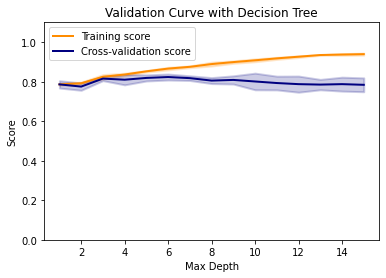

In [16]:
# MACHINE LEARNING MODELS
# We will use validation curves and stratified k-fold cross validation to estimate model accuracy.
Metrics = pd.DataFrame()

## Decision Tree
# Decision trees are easy to use and understand and are often a good exploratory method if you're interested in getting 
# a better idea about what the influential features are in your dataset. 
decision = DecisionTreeClassifier()

# Validation curve
# scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation
param_range = np.arange(1, 16)
train_scores, test_scores = validation_curve(decision, X, y, param_name="max_depth", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


print("TRAIN SCORES:")
print(train_scores)
print("TRAIN SCORES MEAN:")
print(train_scores_mean)

print("TEST SCORES:")
print(test_scores)
print("TEST SCORES MEAN:")
print(test_scores_mean)

plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("DecitionTreeValCurve.jpg")
plt.show()

In [17]:
# From Validation Curve, we choose Max_Depth = 3
Max_Depth = 3
# Cross-validation
decision = DecisionTreeClassifier(max_depth=Max_Depth) # max_depth, min_samples_leaf, random_state, criterion
Cross_val = cross_val_score(decision, X, y, cv=5)
print("Cross validation score:", Cross_val)
print("Cross validation mean", np.mean(Cross_val))

# Individual
decision.fit(X_train, y_train)
y_pred = decision.predict(X_test)
print('Decision Tree Scores:')
print('Train set', round(decision.score(X_train, y_train), 2))
print('Test set', round(decision.score(X_test, y_test), 2))

# Metrics
matrix = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(y_test, y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 2))

precision = precision_score(y_test, y_pred) # Precision: TP / TP+FP
print('Precision', round(precision,2))

recall = recall_score(y_test, y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 2))

f1 = f1_score(y_test, y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 2))

# Saving these measures in dataframe
Metrics['Decition Trees'] = [accuracy, precision, recall, f1]

Metrics.index = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

Cross validation score: [0.8258427  0.81460674 0.8258427  0.79775281 0.81355932]
Cross validation mean 0.8155208531708247
Decision Tree Scores:
Train set 0.83
Test set 0.83
Confusion Matrix:
[[90  8]
 [23 57]]
Accuracy: 0.83
Precision 0.88
Recall: 0.71
F1 Score: 0.79


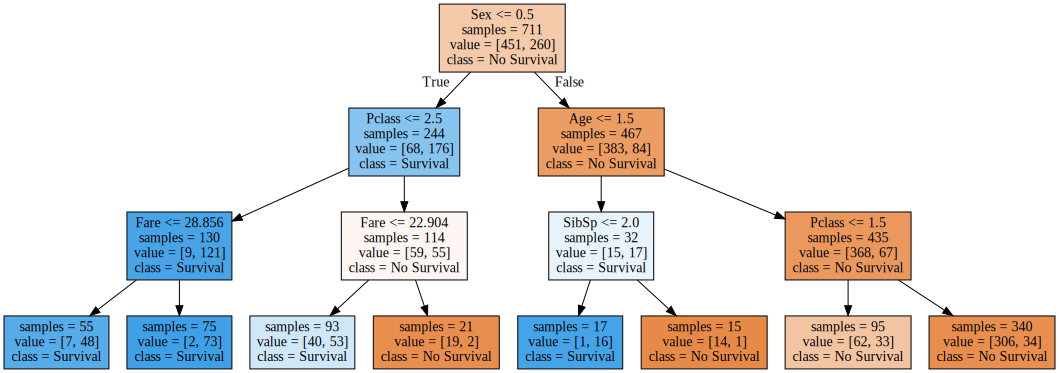

In [18]:
export_graphviz(decision, out_file = 'titanic.dot', class_names = np.array(['No Survival', 'Survival']),
               feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], impurity=False, filled=True)
with open('titanic.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph, format = "png")
graph

In [19]:
# Saving graph
graph.render("decision_tree-" + str(Max_Depth) + "deph")

'decision_tree-3deph.png'

<function matplotlib.pyplot.show(close=None, block=None)>

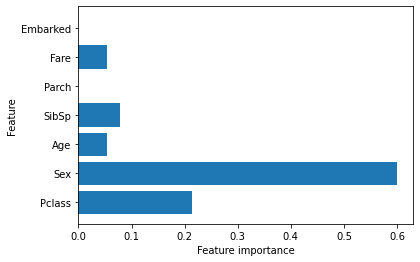

In [20]:
# Feature importance
plt.barh(range(X.shape[1]), decision.feature_importances_)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.savefig("DecisionTreeFeatureImportance.jpg")
plt.show

TRAIN SCORES:
[[0.75246132 0.79184248 0.76371308 0.77637131 0.76544944]
 [0.80872011 0.79324895 0.78199719 0.79606188 0.80617978]
 [0.81997187 0.81997187 0.82841069 0.83403657 0.82865169]
 [0.83825598 0.84810127 0.83966245 0.85513361 0.83286517]
 [0.85091421 0.85935302 0.84950774 0.86357243 0.85814607]
 [0.87763713 0.88185654 0.8649789  0.86638537 0.86376404]
 [0.88748242 0.89592124 0.87341772 0.88045007 0.87359551]
 [0.91279887 0.90154712 0.88045007 0.89592124 0.89466292]
 [0.92264416 0.92123769 0.90998594 0.91279887 0.91151685]
 [0.92967651 0.93389592 0.92123769 0.91842475 0.92977528]
 [0.93248945 0.94092827 0.93248945 0.92686357 0.93398876]
 [0.93108298 0.94374121 0.93670886 0.93108298 0.93679775]
 [0.93811533 0.94514768 0.9395218  0.93670886 0.93960674]
 [0.93670886 0.94655415 0.94092827 0.93530239 0.93960674]
 [0.93811533 0.94796062 0.94233474 0.93670886 0.94101124]]
TRAIN SCORES MEAN:
[0.76996752 0.79724158 0.82620854 0.84280369 0.85629869 0.8709244
 0.88217339 0.89707604 0.91563

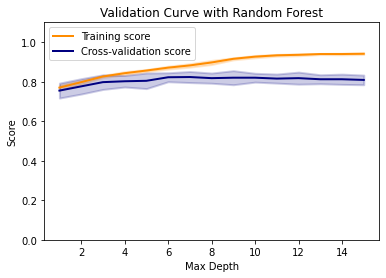

In [21]:
## Random Forest
# Random forests are widely used in practice and achieve very good results on a wide variety of problems.
# One disadvantage of using a single decision tree was that decision trees tend to be prone to overfitting the 
# training data. As its name would suggest, a random forest creates lots of individual decision trees on a 
# training set, often on the order of tens or hundreds of trees. The idea is that each of the individual trees in a 
# random forest should do reasonably well at predicting the target values in the training set but should also be 
#constructed to be different in some way from the other trees in the forest.

forest = RandomForestClassifier(criterion = 'entropy')

# Validation curve
# scoring: https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation
param_range = np.arange(1, 16)
train_scores, test_scores = validation_curve(forest, X, y, param_name="max_depth", param_range=param_range, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


print("TRAIN SCORES:")
print(train_scores)
print("TRAIN SCORES MEAN:")
print(train_scores_mean)

print("TEST SCORES:")
print(test_scores)
print("TEST SCORES MEAN:")
print(test_scores_mean)

plt.title("Validation Curve with Random Forest")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("RandomForestValCurve.jpg")
plt.show()

In [22]:
# From Validation Curve, we choose Max_Depth = 5
Max_Depth = 5
# Cross-validation
forest = RandomForestClassifier(max_depth=Max_Depth) 
Cross_val = cross_val_score(decision, X, y, cv=5)
print("Cross validation score:", Cross_val)
print("Cross validation mean", np.mean(Cross_val))

# Individual
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
print('Random Forest Scores:')
print('Train set', round(forest.score(X_train, y_train), 2))
print('Test set', round(forest.score(X_test, y_test), 2))

# Metrics
matrix = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(y_test, y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 2))

precision = precision_score(y_test, y_pred) # Precision: TP / TP+FP
print('Precision', round(precision,2))

recall = recall_score(y_test, y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 2))

f1 = f1_score(y_test, y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 2))

# Saving these measures in dataframe
Metrics['Random Forest'] = [accuracy, precision, recall, f1]

Cross validation score: [0.8258427  0.81460674 0.8258427  0.79775281 0.81355932]
Cross validation mean 0.8155208531708247
Random Forest Scores:
Train set 0.86
Test set 0.84
Confusion Matrix:
[[93  5]
 [24 56]]
Accuracy: 0.84
Precision 0.92
Recall: 0.7
F1 Score: 0.79


<function matplotlib.pyplot.show(close=None, block=None)>

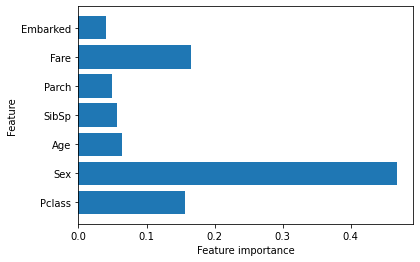

In [23]:
# Feature importance
plt.barh(range(X.shape[1]), forest.feature_importances_)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.savefig("RandomForestFeatureImportance.jpg")
plt.show

In [24]:
## Logistic Regression
# Logistic regression can be seen as a kind of generalized linear model.
# However, unlike ordinary linear regression, in it's most basic form logistic repressions target value is a 
# binary variable instead of a continuous value.
logistic = LogisticRegression(max_iter=200)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Logistic Regression:')
print('Train set', round(logistic.score(X_train, y_train), 2))
print('Test set', round(logistic.score(X_test, y_test), 2))

# Metrics
matrix = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(y_test, y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 2))

precision = precision_score(y_test, y_pred) # Precision: TP / TP+FP
print('Precision', round(precision,2))

recall = recall_score(y_test, y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 2))

f1 = f1_score(y_test, y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 2))

# Saving these measures in dataframe
Metrics['Logistic Regression'] = [accuracy, precision, recall, f1]

Logistic Regression:
Train set 0.8
Test set 0.79
Confusion Matrix:
[[85 13]
 [25 55]]
Accuracy: 0.79
Precision 0.81
Recall: 0.69
F1 Score: 0.74


<function matplotlib.pyplot.show(close=None, block=None)>

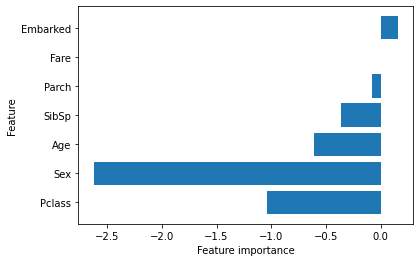

In [25]:
# Feature importance
# get importance
importance = logistic.coef_[0]
# plot feature importance
plt.barh(range(X.shape[1]), importance)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.savefig("LogisticRegressionFeatureImportance.jpg")
plt.show

Naive Bayes:
Train set 0.79
Test set 0.79
Confusion Matrix:
[[83 15]
 [22 58]]
Accuracy: 0.79
Precision 0.79
Recall: 0.72
F1 Score: 0.76


<function matplotlib.pyplot.show(close=None, block=None)>

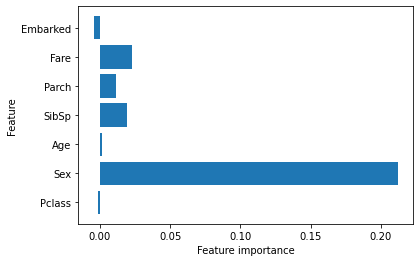

In [26]:
## Naive Bayes
# Naive Bayes classifiers are called naive because informally, they make the simplifying assumption that each feature 
# of an instance is independent of all the others, given the class.
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
print('Naive Bayes:')
print('Train set', round(NB.score(X_train, y_train), 2))
print('Test set', round(NB.score(X_test, y_test), 2))

# Metrics
matrix = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(y_test, y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 2))

precision = precision_score(y_test, y_pred) # Precision: TP / TP+FP
print('Precision', round(precision,2))

recall = recall_score(y_test, y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 2))

f1 = f1_score(y_test, y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 2))

# Saving these measures in dataframe
Metrics['Naive Bayes'] = [accuracy, precision, recall, f1]

# Feature Importance
imps = permutation_importance(NB, X_test, y_test)
plt.barh(range(X.shape[1]), imps.importances_mean)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.savefig("NaiveBayesFeatureImportance.jpg")
plt.show

TRAIN SCORES:
[[0.78199719 0.78762307 0.7862166  0.79465541 0.78651685]
 [0.64416315 0.63572433 0.6511955  0.64838256 0.64606742]
 [0.70604782 0.67229255 0.67510549 0.66807314 0.67696629]
 [0.58790436 0.56540084 0.56821378 0.55555556 0.55337079]]
TRAIN SCORES MEAN:
[0.78740182 0.64510659 0.67969706 0.56608907]
TEST SCORES:
[[0.80337079 0.80898876 0.78651685 0.75280899 0.78531073]
 [0.62921348 0.67977528 0.6011236  0.64606742 0.65536723]
 [0.57865169 0.71348315 0.68539326 0.67977528 0.6779661 ]
 [0.5505618  0.5        0.56741573 0.5505618  0.62146893]]
TEST SCORES MEAN:
[0.78739923 0.6423094  0.66705389 0.55800165]


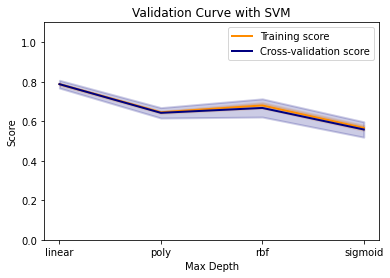

In [27]:
## Support Vector Machines
# So you can see that by defining this concept of margin that sort of quantifies the degree to which the classifier 
# can split the classes into two regions that have some amount of separation between them. We can actually do a search 
# for the classifier that has the maximum margin. This maximum margin classifier is called the Linear Support Vector 
# Machine, also known as an LSVM or a support vector machine with linear kernel.

# Cfloat, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. 
# Must be strictly positive. The penalty is a squared l2 penalty.

# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
# Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, 
# ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute 
# the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
support = SVC()

# Validation curve
param_range = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(support, X, y, param_name="kernel", param_range=param_range, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("TRAIN SCORES:")
print(train_scores)
print("TRAIN SCORES MEAN:")
print(train_scores_mean)

print("TEST SCORES:")
print(test_scores)
print("TEST SCORES MEAN:")
print(test_scores_mean)

plt.title("Validation Curve with SVM")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig("SVMValCurve.jpg")
plt.show()

Support Vector Machines:
Train set 0.79
Test set 0.79
Confusion Matrix:
[[85 13]
 [25 55]]
Accuracy: 0.79
Precision 0.81
Recall: 0.69
F1 Score: 0.74


<function matplotlib.pyplot.show(close=None, block=None)>

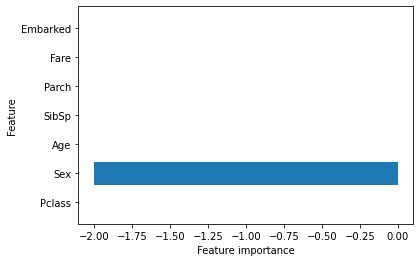

In [28]:
support = SVC(kernel='linear') 
support.fit(X_train, y_train)
y_pred = support.predict(X_test)
print('Support Vector Machines:')
print('Train set', round(support.score(X_train, y_train), 2))
print('Test set', round(support.score(X_test, y_test), 2))

# Metrics
matrix = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix:') # Confusion Matrix [TN FP] ; [FN, TP]
print(matrix)

accuracy = accuracy_score(y_test, y_pred) # Accuracy: TN+TP / TN+TP+FN+FP
print('Accuracy:', round(accuracy, 2))

precision = precision_score(y_test, y_pred) # Precision: TP / TP+FP
print('Precision', round(precision,2))

recall = recall_score(y_test, y_pred) # Recall: TP / TP+FN
print('Recall:', round(recall, 2))

f1 = f1_score(y_test, y_pred) # F1 Score (precision+recall): 2TP / 2TP+FN+FP
print('F1 Score:', round(f1, 2))

# Saving these measures in dataframe
Metrics['SVM'] = [accuracy, precision, recall, f1]

# Feature importance
# get importance
importance = support.coef_[0]
# plot feature importance
plt.barh(range(X.shape[1]), importance)
plt.yticks(np.arange(X.shape[1]), df.columns[1:])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.savefig("SupportVectorMachinesFeatureImportance.jpg")
plt.show

In [29]:
Metrics

,Decition Trees,Random Forest,Logistic Regression,Naive Bayes,SVM
Accuracy,0.825843,0.837079,0.786517,0.792135,0.786517
Precision,0.876923,0.918033,0.808824,0.794521,0.808824
Recall,0.712500,0.700000,0.687500,0.725000,0.687500
F1_Score,0.786207,0.794326,0.743243,0.758170,0.743243


In [32]:
# We choose Random Forest for make predictions 
ids = prediction['PassengerId']

predictRanFor = forest.predict(prediction.drop('PassengerId', axis=1))
RanForest = pd.DataFrame({'PassengerId' : ids, 'Survived': predictRanFor})
print('Random Forest Prediction:')
print(RanForest.head())

Random Forest Prediction:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


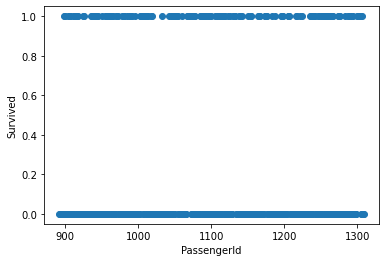

In [33]:
plt.scatter(RanForest['PassengerId'], RanForest['Survived'], label='linear')
plt.xlabel('PassengerId')
plt.ylabel('Survived')
plt.savefig("FinalPrediction.jpg")